# <center> CS559: Homework #2 </center>
###  <center> Due:10/8/2021 Friday 11:59 PM</center>

- Change the file name as YourName_F21_CS559_HW2
- Submit the assignment in `ipynb` and `html` formats. 
    - You can export the notebook in HTML. 
    - Do not compress your files. Please submit files individually. 
- All work must be your own and must not be shared with other classmates. 
    - Collaboration with classmates or getting help by any people is not acceptable. 
    - For impletementation problems, do not copy algorithms from internet. 

### Problem 1 - Linear Regression [35 pts]

1-a. Consider a data set in which each data point $t_n$ is associated with a weighting factor $r_n>0$, so that the sum of squares error function becomes 

$${\large E_D(\vec{w})=\frac{1}{2}\sum_{n=1}^Nr_n\big(t_n-\vec{w}^T\vec{x}_n\big)^2}$$

Find an expression for the solution $w^*$ that minimizes this error function. [5 pts]

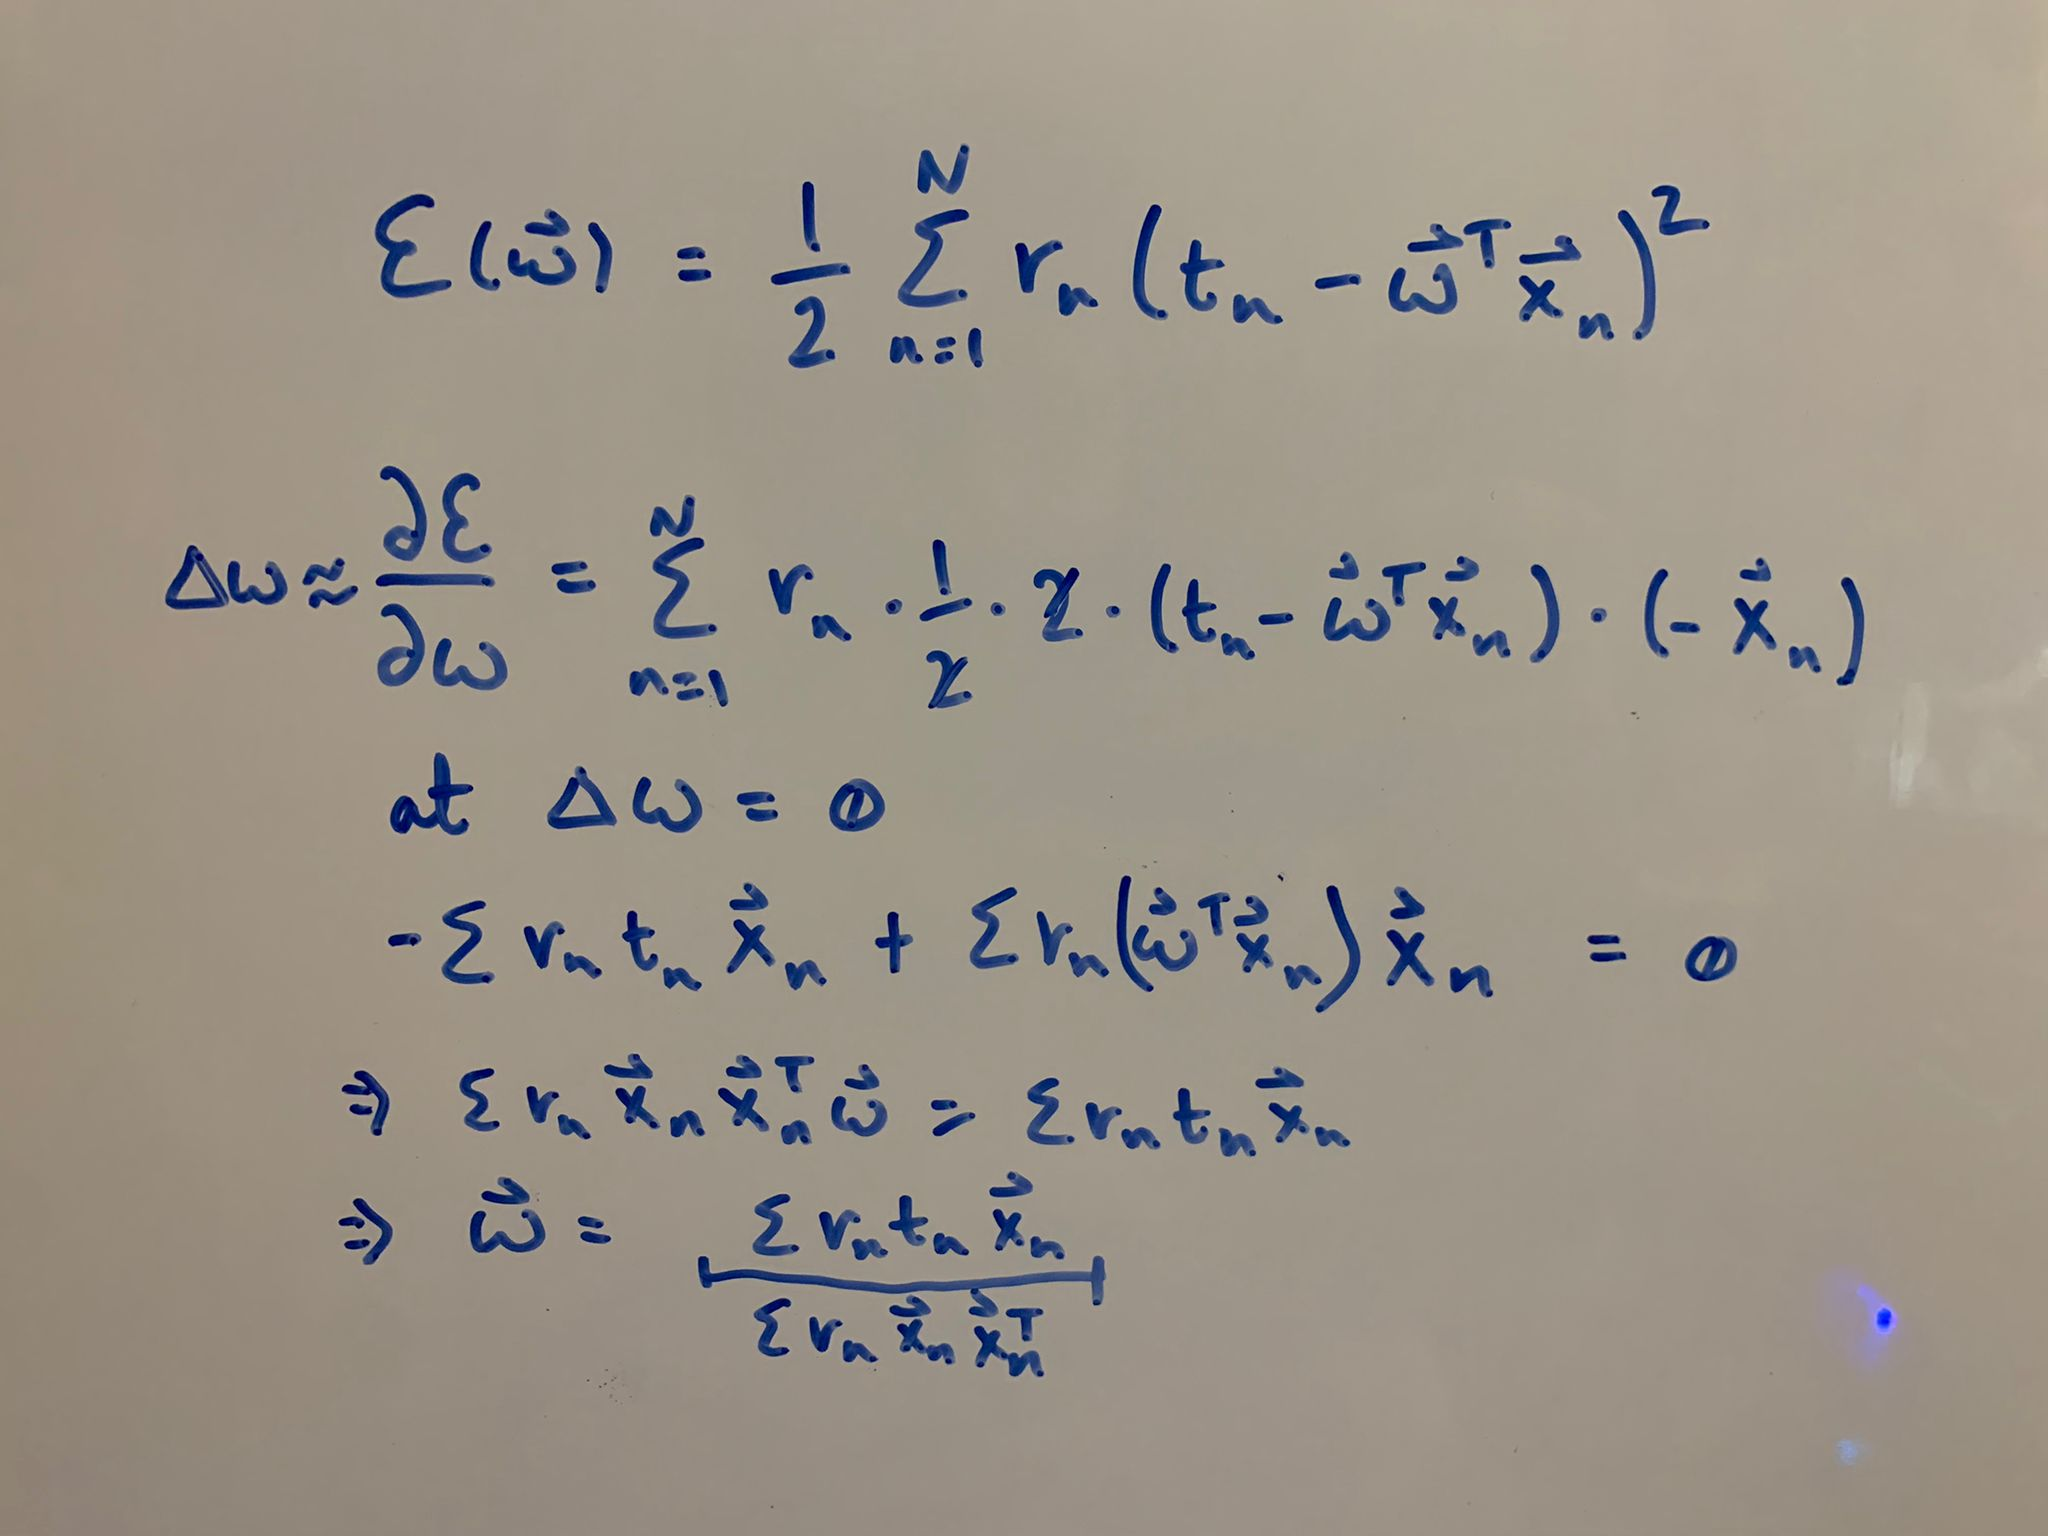

1-b. Implement a function called, `my_error(data,r_n)`, that estimates the error using the error function, $E_D(\vec{w})$, from 1-a. The task to implement a function to estimates the optimized $vec{w}$ and demonstrates the behavior of error at different weighting factor, $r_n$, values. The function return a list of $\vec{w}$, $r_n$, and error. Do not use any other modules except `numpy`. [10 pts]

In [57]:
### my_LR starts here
import numpy as np

def my_error(data,r):
    
    x = np.matrix(data)
    t = x[:,-1]
    x = x[:,:-1]
    
    w_list, error_list = [], []
    
    '''
    for r in r_n:
        
        w = np.dot(np.linalg.inv(np.dot(x.T, np.dot(np.diag(r), x))), np.dot(x.T, np.dot(np.diag(r), t)))

        error = (1/2) * np.dot((np.dot(x, w)- t).T,np.dot(np.diag(r), np.dot(x, w)- t))
        
        w_list.append(w)
    
        error_list.append(error[0,0])
    
    #r_new = (1/2) * np.dot(x,np.dot(np.linalg.inv(np.dot(x.T,np.dot(np.diag(r),x))),np.dot(x.T, t)) - np.dot(np.linalg.inv(np.dot(x.T,np.dot(np.diag(r),x))),np.dot(x.T,np.dot(x, w))))#.diagonal()
    '''
    
    for i in range(x.shape[0]):
        
        w = r[i] * t[i] * x[i] / (r[i] * np.dot(x[i], x[i].T))
        
        err = 0.5 * r[i] * np.square(t[i] - np.dot(w.T, x[i]))
    
        w_list.append(w)
    
        error_list.append(abs(err[0,0]))
    
    return w_list, error_list, r_n

1-c. Load the dataset, make a model using Linear Regression from sklearn.linear_model to predict the target `y` from a given dataset `HW2_LR.csv`. Students must do EDA and pre-processing the dataset before training the model. All pre-processing and EDA work must be explained and the weights and mean squared error value must be reported. Treat the whole dataset as a train set. [15 pts]

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

import pandas as pd

In [4]:
data = pd.read_csv('./HW2_LR.csv')

data

,a,b,c,d,k,y
0,70.40,611.72,2679.33,-0.116531,0.408765,-9.804385e+05
1,297.79,172.91,8986.70,-0.668901,0.906781,1.343908e+06
2,213.93,423.22,1505.50,-0.573668,0.862750,-6.170783e+05
3,39.25,353.36,8332.22,-0.144505,0.730970,2.070210e+06
4,5.95,-174.07,3210.43,-0.157336,-0.175142,-7.709453e+05
...,...,...,...,...,...,...
9995,92.54,-449.98,9065.32,-0.660264,0.183420,-5.496800e+06
9996,133.07,-136.77,2131.28,-0.889858,0.528366,-4.228519e+05
9997,64.41,532.15,7644.74,-1.902000,1.876023,2.085432e+06
9998,85.26,537.28,5741.49,-0.461147,1.355170,1.063961e+06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       10000 non-null  float64
 1   b       10000 non-null  float64
 2   c       10000 non-null  float64
 3   d       10000 non-null  float64
 4   k       10000 non-null  float64
 5   y       10000 non-null  float64
dtypes: float64(6)
memory usage: 468.9 KB
None 

          a         b         c         d         k             y
0 -0.921869  1.481830 -1.023505  0.689698  0.408765 -9.804385e+05
1  1.696926  0.215870  1.354167  0.501335  0.906781  1.343908e+06
2  0.731131  0.938011 -1.466000  0.531671  0.862750 -6.170783e+05 

                  a             b             c             d             k  \
count  1.000000e+04  1.000000e+04  1.000000e+04  10000.000000  10000.000000   
mean  -7.318590e-17 -1.421085e-17 -3.122835e-16      0.486071      0.788158   
std    1.000000e+00  1.000000e+00  1.000000e+

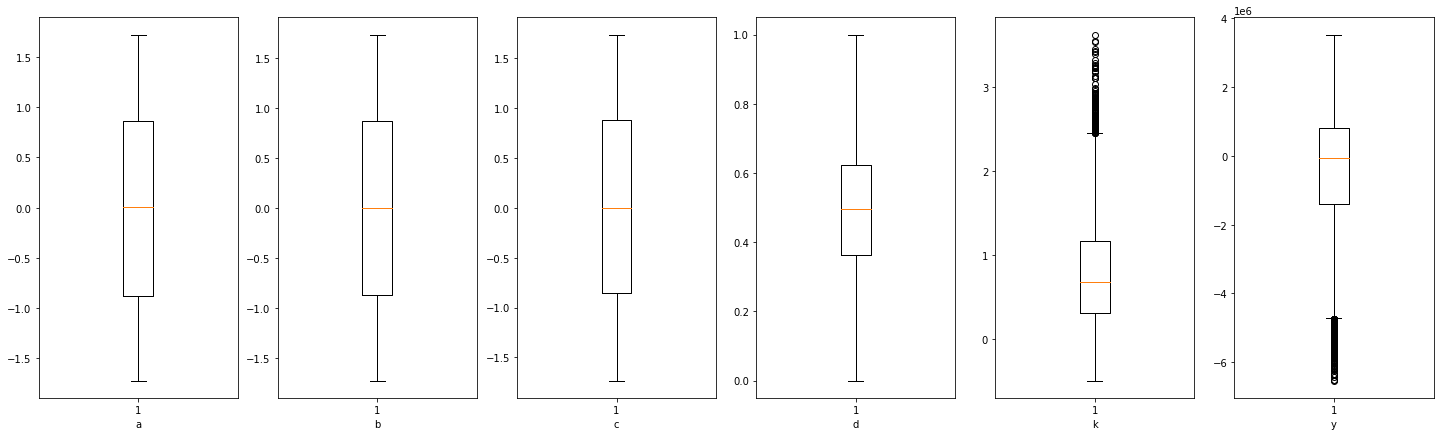

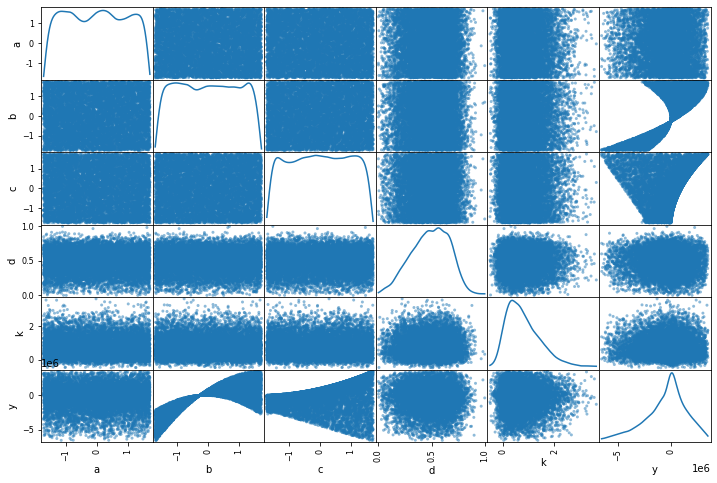

          a         b         c         d         k         y
a  1.000000 -0.000653 -0.006025  0.006158 -0.015583 -0.001269
b -0.000653  1.000000  0.008605 -0.000743 -0.010636  0.757798
c -0.006025  0.008605  1.000000 -0.003658 -0.010417  0.143611
d  0.006158 -0.000743 -0.003658  1.000000 -0.009046 -0.010508
k -0.015583 -0.010636 -0.010417 -0.009046  1.000000 -0.008144
y -0.001269  0.757798  0.143611 -0.010508 -0.008144  1.000000


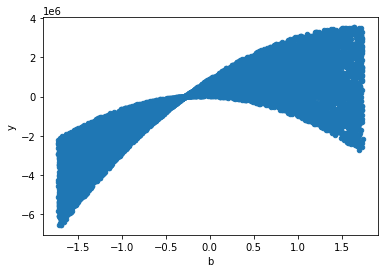

In [86]:
### EDA stars here
print(data.info(),'\n') #To find missing values
print(data.head(3),'\n')#printing first 3 examples of the dataset
print(data.describe(),'\n') #printing discriptive stats for the dataset

features = data.columns.tolist()#extracting the feature names

#box plot to visualize outliars and skew
fig, axs = plt.subplots(1, len(features), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(features)),features):
    axs[i].boxplot(data[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

#plotting scatter matrix to visualize correlation trends and skew
pd.plotting.scatter_matrix(data[features], figsize=(12,8), diagonal="kde")
plt.show()

#numeric values of the correlations b/w features
corr = data.corr()
print(corr)

#plotting best correlation with y
data.plot(kind="scatter", x="b",y="y")
plt.show()

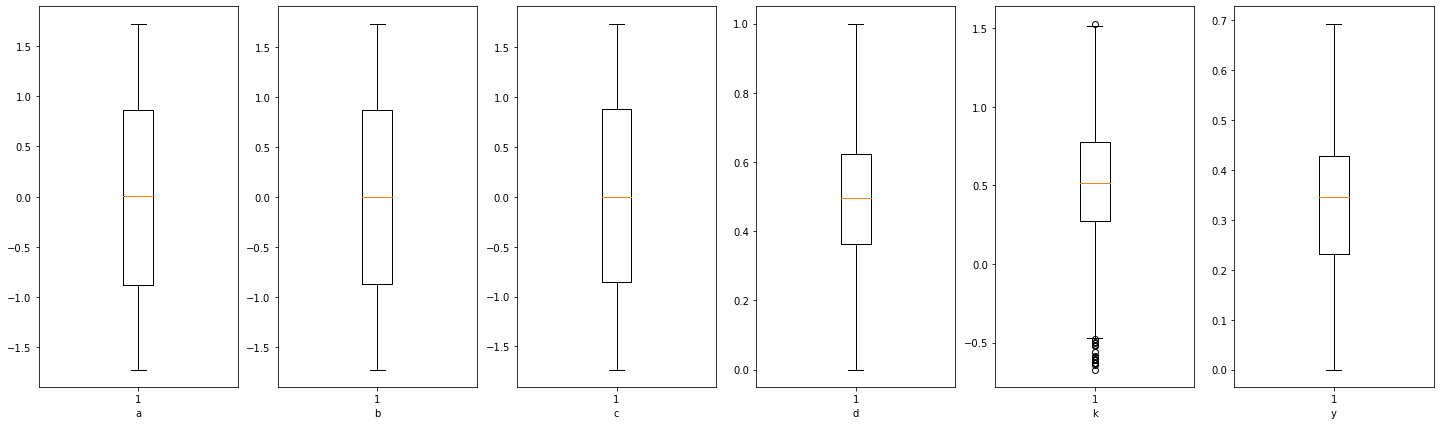

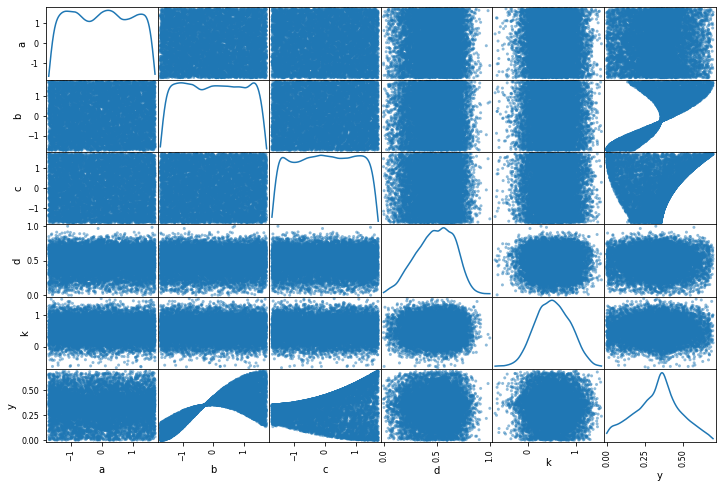

          a         b         c         d         k         y
a  1.000000 -0.000653 -0.006025  0.006158 -0.017387 -0.002304
b -0.000653  1.000000  0.008605 -0.000743 -0.011328  0.759104
c -0.006025  0.008605  1.000000 -0.003658 -0.012006  0.220094
d  0.006158 -0.000743 -0.003658  1.000000 -0.008089 -0.012482
k -0.017387 -0.011328 -0.012006 -0.008089  1.000000 -0.012117
y -0.002304  0.759104  0.220094 -0.012482 -0.012117  1.000000


In [91]:
### Pre-processing starts here
data = pd.read_csv('./HW2_LR.csv')
#data_norm =(data-data.mean())/data.std()

data_norm = data#(data-data.min())/(data.max()-data.min())

#data_norm = data_norm - data_norm.min()

# Scaling and fixing skew of the data

data_norm['a'] =(data['a']-data['a'].mean())/data['a'].std()

data_norm['b'] =(data['b']-data['b'].mean())/data['b'].std()

data_norm['c'] =(data['c']-data['c'].mean())/data['c'].std()

data_norm['k'] = np.log(data['k'] + 1)

data_norm['d'] = np.square((data['d']-data['d'].min())/(data['d'].max()-data['d'].min()))

data_norm['y'] = np.log(1 + np.square((data['y']-data['y'].min())/(data['y'].max()-data['y'].min())))

#box plot to visualize outliars and skew
fig, axs = plt.subplots(1, len(features), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(features)),features):
    axs[i].boxplot(data_norm[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

#plotting scatter matrix to visualize correlation trends and skew
pd.plotting.scatter_matrix(data_norm[features], figsize=(12,8), diagonal="kde")
plt.show()

#plotting best correlation with y
corr = data_norm.corr()
print(corr)

In [97]:
### Linear Regression Modeling starts here
LR = LinearRegression()
LR.fit(X = data_norm[features[:-2]], y = data_norm[features[-1]])#, sample_weight = data_norm[features[-2]]

'''print(LR.score(data_norm[features[:-2]], data_norm[features[-1]]))
print(LR.coef_,LR.intercept_)
print(LR.predict(data_norm[features[:-2]])[:5], data_norm[features[-2]][:5])'''

model_err = mean_squared_error(LR.predict(data_norm[features[:-2]]), data_norm[features[-2]])
print('Final Model Error:', model_err)
print('Model Parameters:',LR.coef_,LR.intercept_)

Final Model Error: 0.17118806032950246
Model Parameters: [-6.79929729e-05  1.13288171e-01  3.19454115e-02 -9.60311879e-03] 0.3363410533602324


1-d. Use the function `my_error()` from 1-b to estimate $\vec{w}$ and make a visualization to show the behavior of error in terms of $r_n$. Add a point to indicate the final training model error obtained from 1-c. [5 pts]

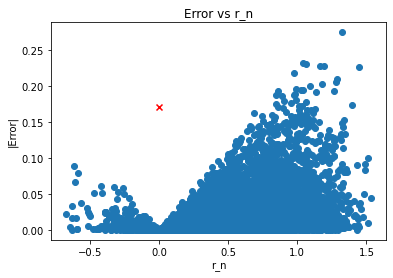

In [96]:
### Visualization starts from here. 
r_n = np.array(data_norm[features[-2]])
dta = data_norm[np.delete(features, 4)]
w_list=[]
error_list=[]
r_n_list=[]

w_list, error_list, r_n_list = my_error(dta, r_n)

plt.scatter(r_n,error_list)
plt.scatter(0,model_err, c='r', marker='x')
plt.title("Error vs r_n")
plt.xlabel("r_n")
plt.ylabel("|Error|")
plt.show()

### Problem 2 - Linear Classification 1 [65 pts]

In this assignment, you are going to implement three classifiers - **LDA, Perceptron, and Logistic Regression** - to predict the risk of heart attack using the provided dataset, `heart.csv`. 

Here are data attributes:
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
- ca: number of major vessels (0-3)
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trtbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- output : 0= less chance of heart attack 1= more chance of heart attack

2-a. Implement `my_LDA` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [101]:
from sklearn.metrics import accuracy_score

In [102]:
### my_LDA starts here

class my_LDA():
    
    def __init__(self, x, y):
        
        self.mu = np.mean(x, axis = 0) #assuming x is of shape [N, num_features], mu [1, num_features]
        
        self.classes = np.unique(y)
        
        self.num_class = len(self.classes)
        
        self.Sw = np.zeros((x.shape[1],x.shape[1])) # Sw = Sc1 + Sc2 + .... => Scn = sum_x_in_cn(dot(x-mu1),(x-mu)) ->(num_features,num_features) 
        
        self.Sb = np.zeros(self.Sw.shape)
        
    def fit(self, x, y):
        
        for cls in self.classes:
            
            # ids of rows where row_output = cls c [0,1]
            
            cls_idx = cls == y
            
            # Only consider features whose output = cls c [0,1]
            
            cls_x = x[cls_idx.squeeze()]
            
            cls_mu = np.mean(cls_x, axis = 0) #(1, num_features)
            
            # within scatter matrix: add sw_cls to Sw
            
            self.Sw += np.dot((cls_x - cls_mu).T,(cls_x - cls_mu)) #(num_features,num_features)
            
            # b/w scatter matrix: add sb_cls to Sb
            
            self.Sb += len(cls_x) * np.dot(np.expand_dims((cls_mu - self.mu),0),np.expand_dims((cls_mu - self.mu),1))
        
        # Using eigen vector method from PCA in HW1 we get the best weight matrix
        
        e_val, e_vect = np.linalg.eig(np.dot(np.linalg.inv(self.Sw),self.Sb))
        
        e_vect = e_vect[:,np.argsort(np.abs(e_val))[::-1]]
        
        self.w = e_vect[:,:1]
        
    def forward(self,x):
        
        return np.dot(x, self.w)
        
    def score(self, x, y, theta = 0.5):
        
        yp = self.forward(x)
        
        yp = [self.classes[0] if yt > theta else self.classes[1] for yt in yp]
        
        return accuracy_score(y, yp)
        

2-b. Implement `my_Perceptron` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [103]:
### my_Perceptron starts here
from tqdm import trange

class my_Perceptron():
    
    def __init__(self, x):
        
        self.w = np.random.rand(x.shape[1],1)
        
        self.w_grad = np.zeros(self.w.shape)
        
        self.loss = []
        
    def sigmoid(self, x):
        
        return np.where(x >= 0, 1/(1 + np.exp(-x)), np.exp(x)/(1 + np.exp(x)))
    
    def MSE_loss(self, y, yp):
        
        yp = np.round(yp, 6)
        
        return (1/(2 * len(y))) * np.sum(np.square(yp - y))
    
    def forward(self, x):
        
        return self.sigmoid(np.dot(x, self.w))
    
    def backward(self, x, y, yp):
        
        yp = np.round(yp, 6)
        
        self.w_grad = - np.dot(x.T, (yp - y) * (yp * (1 - yp))) * (1/len(y))
        
    def step(self, x, y, yp, lr):
        
        self.backward(x, y, yp)
        
        self.w += lr * self.w_grad
        
    def fit(self, x, y, lr = 0.001, eps = 100):
        
        for _ in trange(eps, desc ='Epochs'):
            
            yp = self.forward(x)
            
            self.loss.append(self.MSE_loss(y, yp))
            
            self.step(x, y, yp, lr)
            
        yp = self.forward(x)
            
        self.loss.append(self.MSE_loss(y, yp))
        
        return self.loss
        
    def score(self, x, y, theta = 0.5):
        
        yp = self.forward(x)
        
        yp = [1 if yt > theta else 0 for yt in yp]
        
        return accuracy_score(y, yp)

2-c. Implement `my_LogisticRegression` that classifies the target. Use `accuracy_score` from `sklearn.metrics` to calculate the accuracy. [10 pts]

In [104]:
### my_LogisticRegression starts here

class my_LogisticRegression():
    
    def __init__(self, x):
        
        self.w = np.random.rand(x.shape[1],1)
        
        self.w_grad = np.zeros(self.w.shape)
        
        self.loss = []
        
    def sigmoid(self, x):
        
        return np.where(x >= 0, 1/(1 + np.exp(-x)), np.exp(x)/(1 + np.exp(x)))
    
    def Log_loss(self, y, yp):
        
        #yp = np.round(yp, 6)
        
        #print(max(yp), min(yp),max(y), min(y))
        
        return - np.mean(y * np.log(yp + 1) + (1 - y) * np.log(1 - yp))
    
    def forward(self, x):
        
        return self.sigmoid(np.dot(x, self.w))
    
    def backward(self, x, y, yp):
        
        #yp = np.round(yp, 6)
        
        self.w_grad = np.dot(x.T, (y - yp)) * (1/len(y))
        
    def step(self, x, y, yp, lr):
        
        self.backward(x, y, yp)
        
        self.w += lr * self.w_grad
        
    def fit(self, x, y, lr = 0.001, eps = 100):
        
        for _ in trange(eps, desc ='Epochs'):
            
            yp = self.forward(x)
            
            self.loss.append(self.Log_loss(y[:,0], yp))
            
            self.step(x, y, yp, lr)
            
        yp = self.forward(x)
            
        self.loss.append(self.Log_loss(y[:,0], yp))
        
        return self.loss
        
    def score(self, x, y, theta = 0.5):
        
        yp = self.forward(x)
        
        yp = [1 if yt >= theta else 0 for yt in yp]
        
        return accuracy_score(y, yp)

2-d. The EDA and pre-processing are not limitted however, you must
1. check if the data is **balanced** or not. 
2. check if features are **skewed** or not.
3. check outliers. 

For any finds from 1 to 3, please handle the data carefully. Exaplin your workflow and perform accordingly. If any interesting facts are learned, please state them. [15 pts]

1    165
0    138
Name: output, dtype: int64


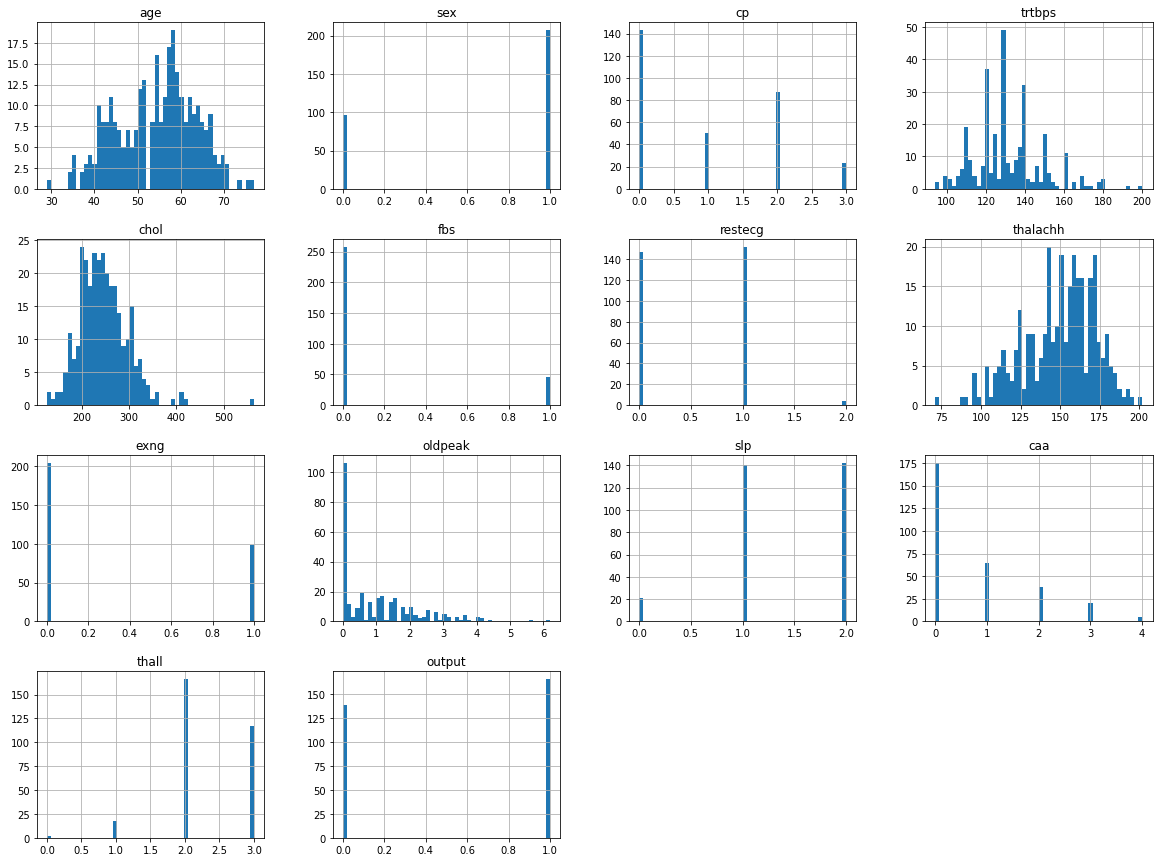

              age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

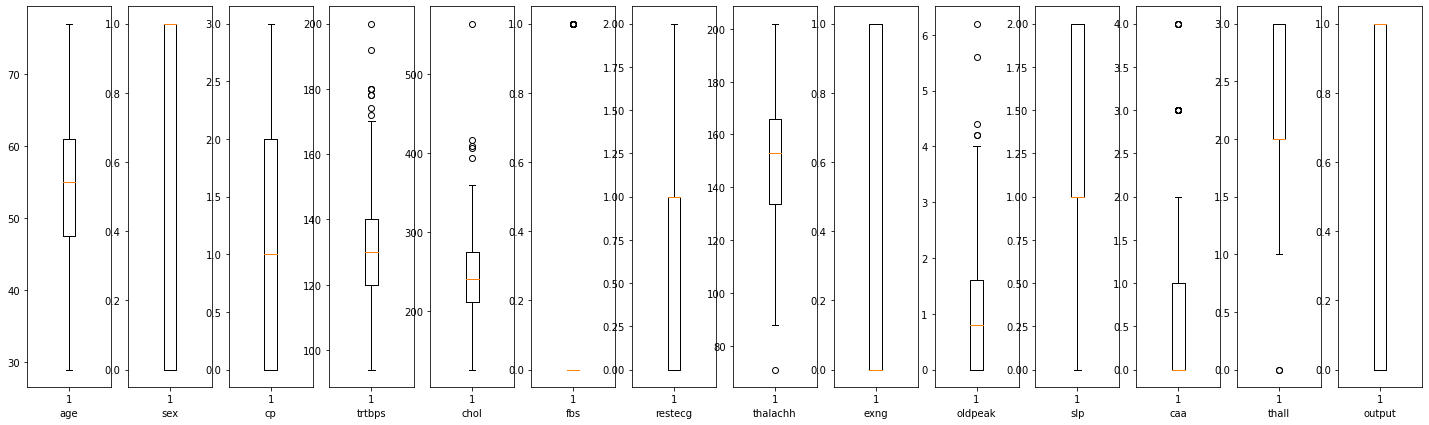

               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.03

In [264]:
### EDA stars here
db = pd.read_csv('./heart.csv') #loading the dataset
print(db['output'].value_counts()) # 1-> 165, 0-> 138... Seems to be slightly imbalanced

db.hist(bins=50, figsize=(20,15)) #some of the features seem skewed
plt.show()

print(db.describe()) #sanity check for previous observations

#visualizing box plots ofr outliar detecection
fig, axs = plt.subplots(1, len(db.columns.tolist()), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(db.columns.tolist())),db.columns.tolist()):
    axs[i].boxplot(db[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

#infering the correlations
cor = db.corr()
print(cor)

              age         sex          cp      trtbps        chol         fbs  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean    53.992958    0.700704    0.989437  129.911972  242.077465    0.140845   
std      9.161678    0.458758    1.031258   15.368133   44.753834    0.348476   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     46.750000    0.000000    0.000000  120.000000  209.750000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  239.000000    0.000000   
75%     60.000000    1.000000    2.000000  140.000000  270.250000    0.000000   
max     77.000000    1.000000    3.000000  170.000000  360.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean     0.524648  150.042254    0.316901    0.948592    1.429577    0.707746   
std      0.514206   22.6927

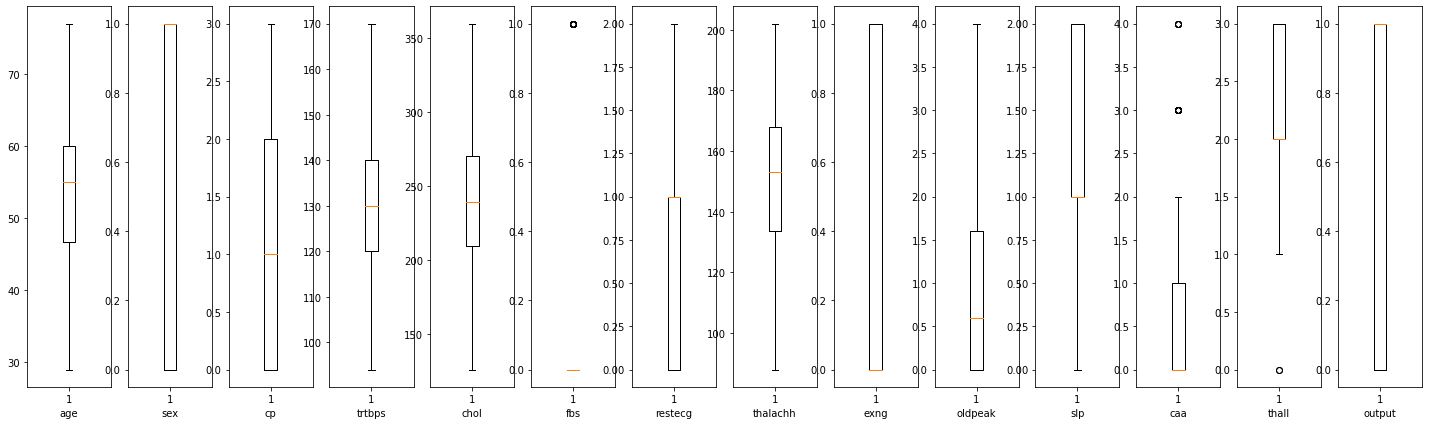

              age         sex          cp      trtbps        chol         fbs  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean     0.424112    0.700704    0.989437    0.472526    0.496058    0.140845   
std      0.193090    0.458758    1.031258    0.202212    0.191256    0.348476   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.264298    0.000000    0.000000    0.342105    0.357906    0.000000   
50%      0.429245    1.000000    1.000000    0.473684    0.482906    0.000000   
75%      0.542256    1.000000    2.000000    0.605263    0.616453    0.000000   
max      1.000000    1.000000    3.000000    1.000000    1.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  284.000000  284.000000  284.000000  284.000000  284.000000  284.000000   
mean     0.524648    0.462245    0.316901    0.948592    1.429577    0.707746   
std      0.514206    0.1992

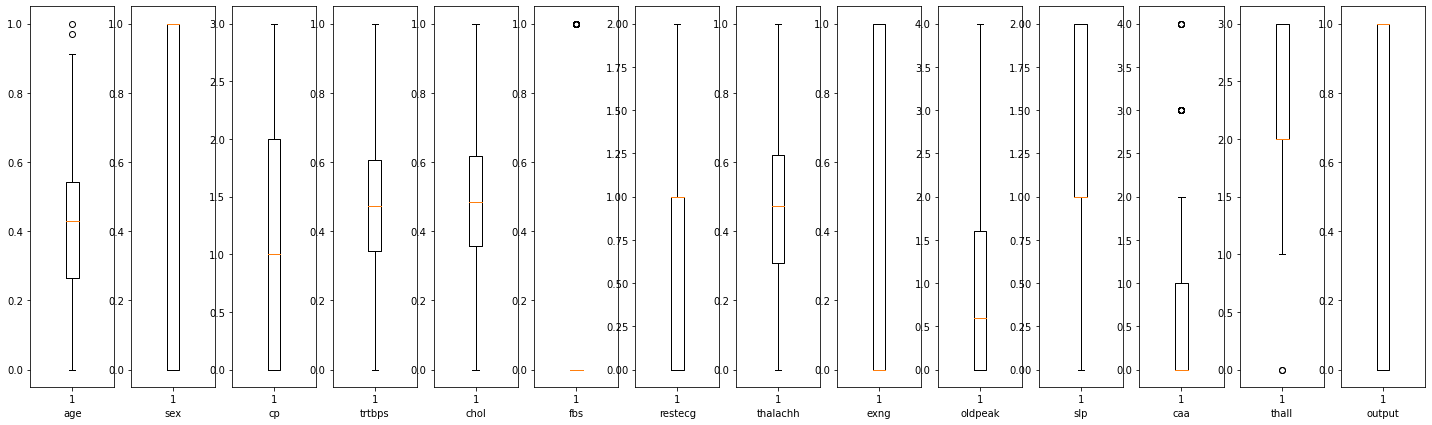

               age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.074475 -0.056380  0.277505  0.169685  0.097008   
sex      -0.074475  1.000000 -0.088865  0.008780 -0.126743  0.065687   
cp       -0.056380 -0.088865  1.000000  0.084889 -0.085120  0.082816   
trtbps    0.277505  0.008780  0.084889  1.000000  0.111825  0.126368   
chol      0.169685 -0.126743 -0.085120  0.111825  1.000000  0.015158   
fbs       0.097008  0.065687  0.082816  0.126368  0.015158  1.000000   
restecg  -0.108629 -0.080962  0.083788 -0.137224 -0.146415 -0.078602   
thalachh -0.421947 -0.033440  0.286958 -0.067485 -0.032687 -0.024890   
exng      0.091118  0.180735 -0.389993  0.000455  0.079792  0.007048   
oldpeak   0.211139  0.154856 -0.125400  0.142423 -0.004568  0.016368   
slp      -0.147395 -0.057669  0.098872 -0.081073  0.034071 -0.070795   
caa       0.295827  0.154794 -0.156713  0.109499  0.061745  0.148502   
thall     0.052231  0.241863 -0.180510 -0.011922  0.093842 -0.06

In [98]:
### Pre-processing starts here
db = pd.read_csv('./heart.csv')

#outliar removal using boxplot:
db = db[db.trtbps <= 170]
db = db[db.chol <= 380]
db = db[db.thalachh >= 80]
db = db[db.oldpeak <= 4]

print(db.describe())#sanity check

#visualizing dataset - possible outliars
fig, axs = plt.subplots(1, len(db.columns.tolist()), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(db.columns.tolist())),db.columns.tolist()):
    axs[i].boxplot(db[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

#fixing skewness and scaling data
db['chol'] = (db['chol'] - np.min(db['chol']))/(np.max(db['chol']) - np.min(db['chol']))
db['trtbps'] = (db['trtbps'] - np.min(db['trtbps']))/(np.max(db['trtbps']) - np.min(db['trtbps']))
db['age'] = np.square(db['age'])
db['age'] = (db['age'] - np.min(db['age']))/(np.max(db['age']) - np.min(db['age']))
db['thalachh'] = np.square(db['thalachh'])
db['thalachh'] = (db['thalachh'] - np.min(db['thalachh']))/(np.max(db['thalachh']) - np.min(db['thalachh']))

print(db.describe())#sanity check

#visualizing dataset - possible outliars + skewness fix
fig, axs = plt.subplots(1, len(db.columns.tolist()), figsize = (25,7),facecolor='white')
for i,feat in zip(range(len(db.columns.tolist())),db.columns.tolist()):
    axs[i].boxplot(db[feat].dropna())
    axs[i].set_xlabel(feat)
plt.show()

#inferring the new correlations
cor = db.corr()
print(cor)
#It appears that the correlationships have improved wrt prediction after preprossing

# Removing data with poor/very low |corr| values
db.pop('chol')
db.pop('fbs')
db.pop('restecg')
db.pop('trtbps')

#fixing data structure/shape for models
y = np.expand_dims(db['output'],1)
db.pop('output')
x = db.to_numpy()

print(x.shape,y.shape)

2-e. Use ML LDA, Perceptron, and LogisticRegression from sklearn to classify the trained data and report the accuracy. [10 pts]

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron

In [106]:
### LDA starts here
clf1= LinearDiscriminantAnalysis()
clf1.fit(x,y[:,0])
y_pred = clf1.transform(x)
y_pred = [1 if yt <= 0.5 else 0 for yt in y_pred]
clf1_accuracy = accuracy_score(y,y_pred)
clf1_accuracy

0.8345070422535211

In [107]:
### Perceptron starts here
clf2 = Perceptron()
clf2.fit(x,y[:,0])
y_pred = clf2.predict(x)
y_pred = [1 if yt > 0.5 else 0 for yt in y_pred]
clf2_accuracy = accuracy_score(y,y_pred)
clf2_accuracy

0.8485915492957746

In [108]:
### Logistic Regression starts here
clf3 = LogisticRegression()
clf3.fit(x,y[:,0])
y_pred = clf3.predict(x)
y_pred = [1 if yt > 0.5 else 0 for yt in y_pred]
clf3_accuracy = accuracy_score(y,y_pred)
clf3_accuracy

0.8556338028169014

2-f. Use the implemented classifiers from 2-a to 2-c and classify the output. [10 pts] 

In [109]:
clf4= my_LDA(x,y)
clf4.fit(x,y)
clf4_accuracy = clf4.score(x,y)
clf4_accuracy

0.5598591549295775

In [112]:
clf5= my_Perceptron(x)
clf5.fit(x, y, lr = 1.5E-1, eps = 1000)
clf5_accuracy = clf5.score(x, y)
clf5_accuracy

Epochs: 100%|██████████| 1000/1000 [00:00<00:00, 15254.23it/s]


0.8309859154929577

In [122]:
clf6= my_LogisticRegression(x)
clf6.fit(x, y, lr = 1E-1, eps = 200)
clf6_accuracy = clf6.score(x, y, 0.5)
clf6_accuracy

Epochs: 100%|██████████| 200/200 [00:00<00:00, 6344.00it/s]


0.8415492957746479

In [123]:
result_table = pd.DataFrame({'Model':['clf1','clf2','clf3','clf4','clf5','clf6'],
                             'Accuracy':[clf1_accuracy,clf2_accuracy,clf3_accuracy,
                                        clf4_accuracy,clf5_accuracy,clf6_accuracy]})
result_table

,Model,Accuracy
0,clf1,0.834507
1,clf2,0.848592
2,clf3,0.855634
3,clf4,0.559859
4,clf5,0.830986
5,clf6,0.841549
